In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('/content/Netflix Dataset (5).csv')

In [ ]:
data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
data.shape

(7789, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [ ]:
data.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


**Renaming the column names to the appropiate one**

In [ ]:
data.rename(columns={
    'Release_Date':'Added_date',
    'Type':'Genres',
    'Category':'Show_Type'

},inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Show_Id      7789 non-null   object
 1   Show_Type    7789 non-null   object
 2   Title        7789 non-null   object
 3   Director     5401 non-null   object
 4   Cast         7071 non-null   object
 5   Country      7282 non-null   object
 6   Added_date   7779 non-null   object
 7   Rating       7782 non-null   object
 8   Duration     7789 non-null   object
 9   Genres       7789 non-null   object
 10  Description  7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


**Changing the data types to appropiate one**

In [ ]:
data['Added_date']=pd.to_datetime(data['Added_date'].str.strip(),errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Show_Id      7789 non-null   object        
 1   Show_Type    7789 non-null   object        
 2   Title        7789 non-null   object        
 3   Director     5401 non-null   object        
 4   Cast         7071 non-null   object        
 5   Country      7282 non-null   object        
 6   Added_date   7779 non-null   datetime64[ns]
 7   Rating       7782 non-null   object        
 8   Duration     7789 non-null   object        
 9   Genres       7789 non-null   object        
 10  Description  7789 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 669.5+ KB


In [ ]:
data.duplicated().value_counts()

,count
False,7787
True,2


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().value_counts()

,count
False,7787


In [ ]:
data.isnull().sum()

,0
Show_Id,0
Show_Type,0
Title,0
Director,2388
Cast,718
Country,507
Added_date,10
Rating,7
Duration,0
Genres,0


In [ ]:
data.isnull().sum().sum()

np.int64(3630)

**Dropping the director column because it having lots of  missing values and there need of this column**

In [ ]:
data.drop(['Director'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Show_Id      7787 non-null   object        
 1   Show_Type    7787 non-null   object        
 2   Title        7787 non-null   object        
 3   Cast         7069 non-null   object        
 4   Country      7280 non-null   object        
 5   Added_date   7777 non-null   datetime64[ns]
 6   Rating       7780 non-null   object        
 7   Duration     7787 non-null   object        
 8   Genres       7787 non-null   object        
 9   Description  7787 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 669.2+ KB


In [ ]:
data.isnull().sum()

,0
Show_Id,0
Show_Type,0
Title,0
Cast,718
Country,507
Added_date,10
Rating,7
Duration,0
Genres,0
Description,0


**Dropping the null values from Added-date column because we cant fill date**

In [ ]:
data.dropna(subset=['Added_date'],inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7788
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Show_Id      7777 non-null   object        
 1   Show_Type    7777 non-null   object        
 2   Title        7777 non-null   object        
 3   Cast         7059 non-null   object        
 4   Country      7271 non-null   object        
 5   Added_date   7777 non-null   datetime64[ns]
 6   Rating       7770 non-null   object        
 7   Duration     7777 non-null   object        
 8   Genres       7777 non-null   object        
 9   Description  7777 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 668.3+ KB


In [ ]:
data.isnull().sum()

,0
Show_Id,0
Show_Type,0
Title,0
Cast,718
Country,506
Added_date,0
Rating,7
Duration,0
Genres,0
Description,0


**Adding a new column Year_added by Extracting year from Added_date column**

In [ ]:
data['Year_added']=data['Added_date'].dt.year.astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Show_Id      7777 non-null   object        
 1   Show_Type    7777 non-null   object        
 2   Title        7777 non-null   object        
 3   Cast         7059 non-null   object        
 4   Country      7271 non-null   object        
 5   Added_date   7777 non-null   datetime64[ns]
 6   Rating       7770 non-null   object        
 7   Duration     7777 non-null   object        
 8   Genres       7777 non-null   object        
 9   Description  7777 non-null   object        
 10  Year_added   7777 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 729.1+ KB


In [ ]:
data.isnull().sum()

,0
Show_Id,0
Show_Type,0
Title,0
Cast,718
Country,506
Added_date,0
Rating,7
Duration,0
Genres,0
Description,0


**Having null values in country column so replacing them with unknown**

In [ ]:
data['Country'].fillna('Unknown',inplace=True)

/tmp/ipython-input-3501934893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Country'].fillna('Unknown',inplace=True)


In [ ]:
data.isnull().sum()

,0
Show_Id,0
Show_Type,0
Title,0
Cast,718
Country,0
Added_date,0
Rating,7
Duration,0
Genres,0
Description,0


**okay so we did almost cleaning of data now it's time to analyze and visualize it**

**Analizing Tvshows abnd movies over the years**

In [ ]:
sns.set_style("whitegrid")

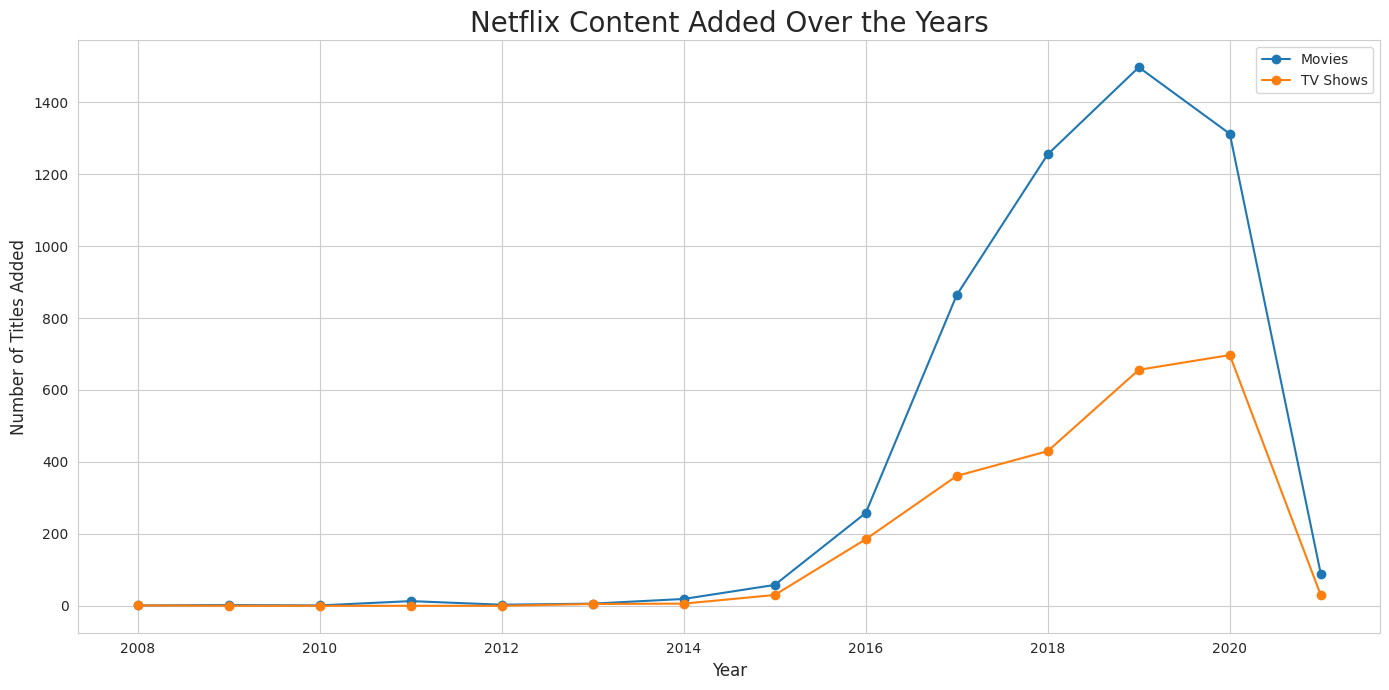

In [ ]:
content_by_year = data.groupby(['Year_added', 'Show_Type']).size().unstack().fillna(0)

# Create the line plot
plt.figure(figsize=(14, 7))
plt.plot(content_by_year.index, content_by_year['Movie'], marker='o', label='Movies')
plt.plot(content_by_year.index, content_by_year['TV Show'], marker='o', label='TV Shows')
plt.title('Netflix Content Added Over the Years', fontsize=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Analyzing the  Top Genres**

In [ ]:
# Handle titles with multiple genres by creating a new row for each genre
genres_df = data.assign(single_genre=data['Genres'].str.split(', ')).explode('single_genre')

In [ ]:
# Count the occurrences of each genre and get the top 15
top_genres = genres_df['single_genre'].value_counts().head(15)


/tmp/ipython-input-3394549394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


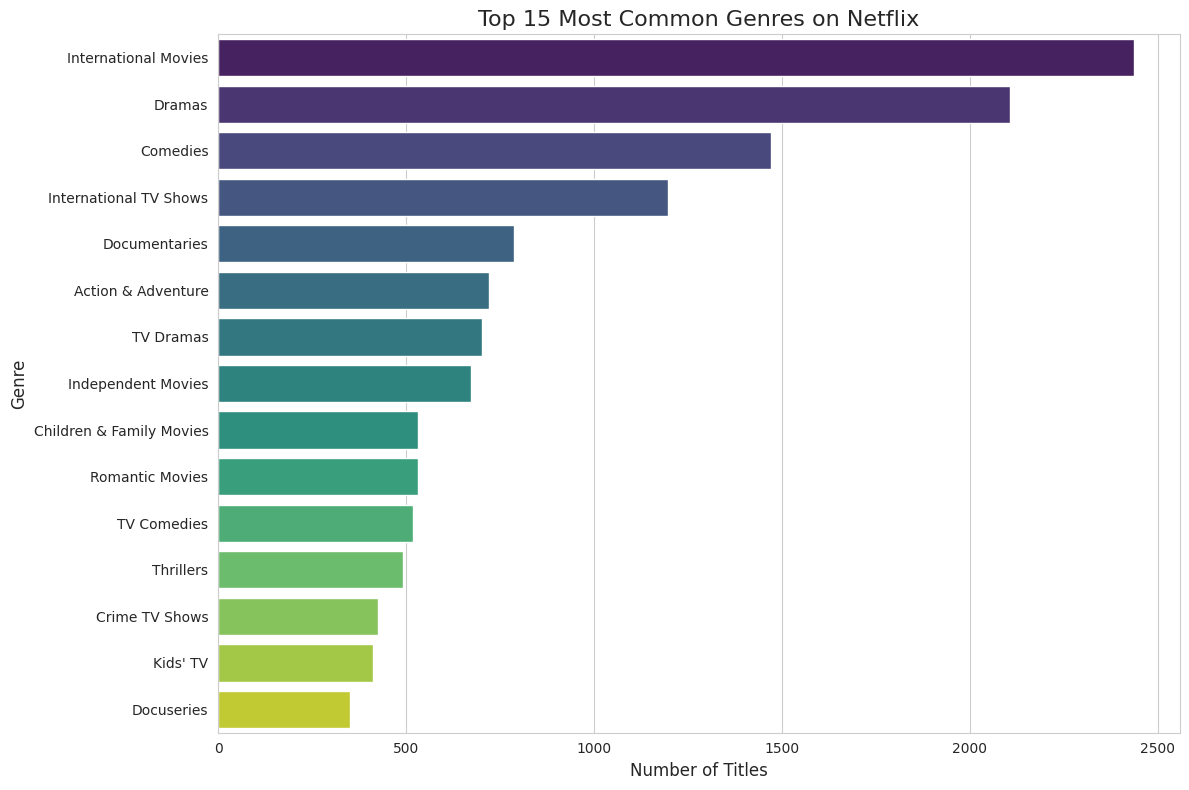

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 15 Most Common Genres on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()

**Analyzing the  Top Countries**

In [ ]:
# Handle titles with multiple countries by creating a new row for each country
countries_df = data.assign(single_country=data['Country'].str.split(', ')).explode('single_country')

In [ ]:
# Clean up country names (remove extra spaces) and filter out the 'Unknown' entries
countries_df['single_country'] = countries_df['single_country'].str.strip()
countries_df = countries_df[countries_df['single_country'] != 'Unknown']

In [ ]:
# Count the titles from each country and get the top 15
top_countries = countries_df['single_country'].value_counts().head(15)


/tmp/ipython-input-2640492892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='plasma')


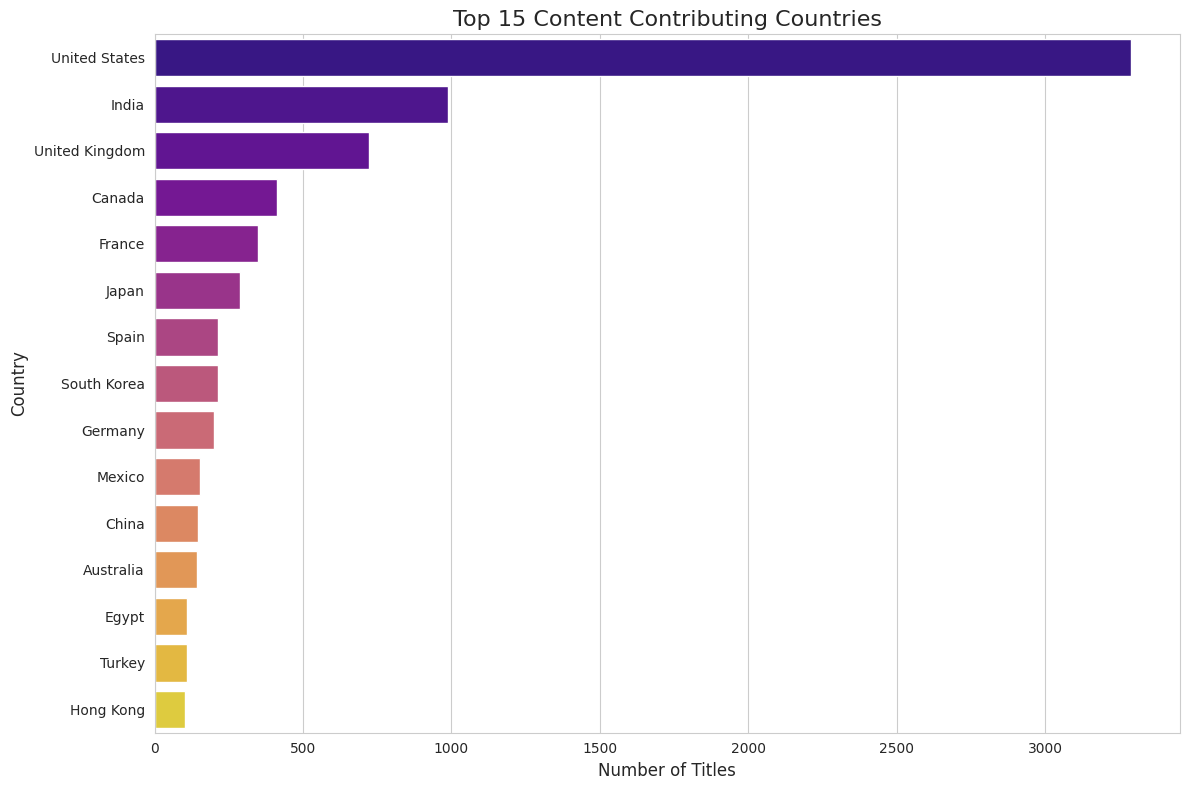

In [ ]:
#  plotting the top 15 countries
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='plasma')
plt.title('Top 15 Content Contributing Countries', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()